This notebook is designed to test the inference API. I will load continious waveform from our dataset, and make a post call to see if the API is working.

In [1]:
import h5py
import httpx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f=h5py.File("../dataset/waveform.h5","r")

In [3]:
net,sta="11_52111","A01"
data=f[net][sta]
for key,val in data.attrs.items():
    print(key,val)

azimuth 261.40685527899217
back_azimuth 81.63077771907837
begin_time 2009-12-02T01:10:41.317870
component ['1' '2' 'Z']
distance_km 64.03723091735361
dt_s 0.025
elevation_m -1059.0
end_time 2009-12-02T01:20:41.317870
event_id 11_52111
latitude -21.533899
local_depth_m 0.0
location 
longitude -175.623505
network YL
phase_index [ 9600 10001]
phase_polarity ['N' 'N']
phase_score [1 1]
phase_time ['2009-12-02T01:14:41.317870' '2009-12-02T01:14:51.343700']
phase_type ['P' 'S']
snr [5.20634372 8.18201576 9.42164388]
station A01
takeoff_angle 124.5301244813764
unit m/s


In [4]:
id=[f"{net}.{sta}"]
timestamp=[f"{data.attrs['begin_time']}"]
vec=[data[...].tolist()]
extract_phases=["P","S"]
extract_phase_sensitivity=[0.5,0.5]

headers = {
    'Content-Type': 'application/json'
}

request_body={
    "id":id,
    "timestamp":timestamp,
    "vec":vec,
    "extract_phases":extract_phases,
    "extract_phase_sensitivity":extract_phase_sensitivity
}

In [5]:
url = "http://0.0.0.0:8080/predict"
response = httpx.post(url, headers=headers, json=request_body,timeout=600)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    print("Request was successful!")
    print("Response:", response.json())
else:
    print("Request failed with status code:", response.status_code)

Request was successful!
Response: {'id': ['11_52111.A01'], 'possibility': [{'noise': [0.9999445676803589, 0.999966025352478, 0.9999752044677734, 0.9999819993972778, 0.9999873638153076, 0.9999885559082031, 0.9999896287918091, 0.9999905824661255, 0.9999914169311523, 0.9999915361404419, 0.999991774559021, 0.9999920129776001, 0.9999922513961792, 0.9999916553497314, 0.9999911785125732, 0.999990701675415, 0.9999899864196777, 0.99998939037323, 0.9999887943267822, 0.9999880790710449, 0.9999873638153076, 0.9999854564666748, 0.9999831914901733, 0.9999804496765137, 0.9999775886535645, 0.999974250793457, 0.999970555305481, 0.9999661445617676, 0.9999610185623169, 0.9999580383300781, 0.9999547004699707, 0.9999511241912842, 0.9999473094940186, 0.9999446868896484, 0.9999420642852783, 0.9999392032623291, 0.9999362230300903, 0.9999328851699829, 0.9999293088912964, 0.9999254941940308, 0.9999215602874756, 0.9999182224273682, 0.9999146461486816, 0.9999110698699951, 0.9999074935913086, 0.9999030828475952, 0

['11_52111.A01'] [{'P': [9601.0], 'S': [10004.0]}] [{'P': [0.9713446497917175], 'S': [0.9818442463874817]}] [{'P': ['2009-12-02 01:14:41.342870'], 'S': ['2009-12-02 01:14:51.417870']}]


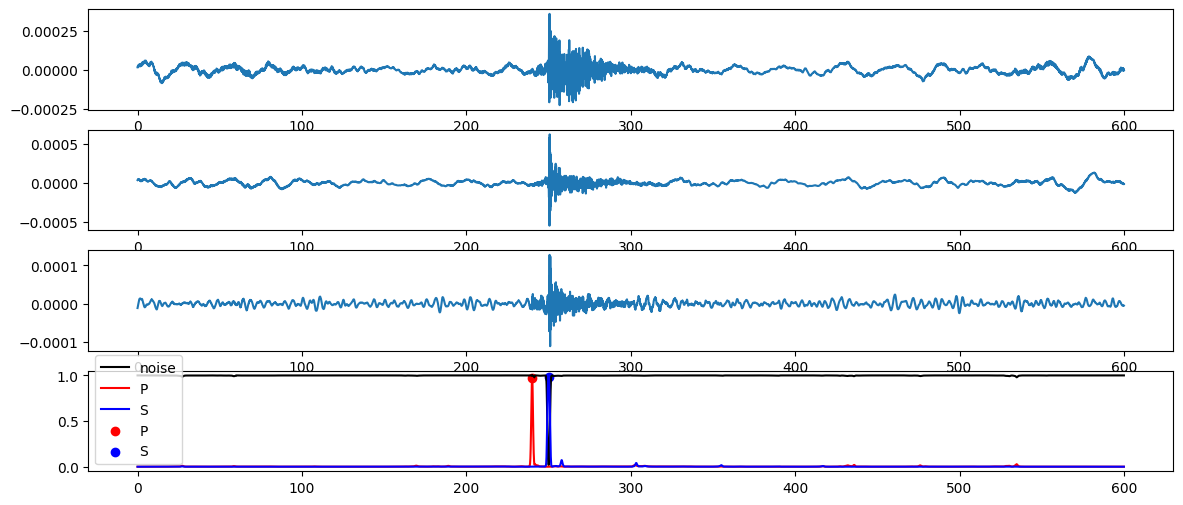

In [7]:
def show_response(request,response):
    res=response.json()
    print(res["id"],res["arrivals"],res["amps"],res["arrival_times"])

    # plot
    fig,ax=plt.subplots(4,1,figsize=(14,6))
    # plot waveform
    dt_s=0.025
    x=np.arange(0,len(request["vec"][0][0]))*dt_s
    ax[0].plot(x,request["vec"][0][0])
    ax[1].plot(x,request["vec"][0][1])
    ax[2].plot(x,request["vec"][0][2])
    colors={
        "noise":"black",
        "P":"red",
        "S":"blue",
    }
    # plot possibility
    for phase in res["possibility"][0].keys():
        ax[3].plot(x,res["possibility"][0][phase],label=phase,color=colors[phase])
    ax[3].legend()
    # plot arrival
    for phase in res["arrivals"][0].keys():
        ax[3].scatter(np.array(res["arrivals"][0][phase])*dt_s,res["amps"][0][phase],label=phase,color=colors[phase])
    ax[3].legend()
    plt.show()


show_response(request_body,response)